# Pymaceuticals Inc.
---

### Analysis

There is clear evidence that Capomulin and Ramicane are the two most effective medication regimens reducing tumor growth based on the average tumor volume. Capomulin had the highest number of mice that survived the entire study, followed closely by Ramicane. On the other hand, Propriva had the lowest survival rate among the drugs studied.

There is a strong correlation between mouse weight and tumor volume, suggesting that mouse weight may influence the effectiveness of the drugs administered during the study.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_data_complete = pd.merge (mouse_metadata, study_results, how = "inner", on = ["Mouse ID"])

# Display the data table for preview
results_data_complete. head ()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
print(len(mouse_metadata))

249


In [5]:
print(len(results_data_complete))

1893


In [6]:
results_data_complete['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
results_data_complete. info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
# Checking the number of mice.
mice_count = results_data_complete ["Mouse ID"] .nunique ()
mice_count                                  

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#mice = results_data_complete.loc [:, ["Mouse ID","Timepoint"]]
#mice. head (10)
results_data_complete ["Mouse_time"] = results_data_complete["Mouse ID"]+"_"+ results_data_complete ["Timepoint"].astype (str) 
results_data_complete

#mice_time=results_data_complete.groupby (["Mouse ID"]) ["Timepoint"].unique ()
#mice_time. head ()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#pd = pd.concat ([0,1], ignore_index =True)
#mice_time = results_data_complete.duplicated (subset =  ["Mouse_time"], keep = False)]
#dupolicated_mice_time= results_data_complete [mice_time]
#dupolicated_mice_time. head (10)
duplicates_mice = results_data_complete[results_data_complete.duplicated(subset="Mouse_time", keep=False)]
duplicates_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse_time
908,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989_5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989_10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989_15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989_20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


In [10]:
results_data_complete. info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
 8   Mouse_time          1893 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 147.9+ KB


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#results_data_clean=results_data_complete.drop_duplicates()
#results_data_complete.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False, inplace=True)

In [13]:
results_data_complete = results_data_complete.loc[(results_data_complete['Mouse ID'] != 'g989'), :]
results_data_complete.head (20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse_time
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20
5,k403,Ramicane,Male,21,16,25,33.464577,1,k403_25
6,k403,Ramicane,Male,21,16,30,31.099498,1,k403_30
7,k403,Ramicane,Male,21,16,35,26.546993,1,k403_35
8,k403,Ramicane,Male,21,16,40,24.365505,1,k403_40
9,k403,Ramicane,Male,21,16,45,22.050126,1,k403_45


In [14]:
# Checking the number of mice in the clean DataFrame.
count_new=results_data_complete ["Mouse ID"]. nunique ()
count_new           

248

In [15]:
results_data_complete['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [16]:
## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_mean=results_data_complete.groupby (["Drug Regimen"]) ["Tumor Volume (mm3)"].mean ()
drug_regimen_median=results_data_complete.groupby (["Drug Regimen"]) ["Tumor Volume (mm3)"].median ()
drug_regimen_var=results_data_complete.groupby (["Drug Regimen"]) ["Tumor Volume (mm3)"].var ()
drug_regimen_std=results_data_complete.groupby (["Drug Regimen"]) ["Tumor Volume (mm3)"].std ()
drug_regimen_sem=results_data_complete.groupby (["Drug Regimen"]) ["Tumor Volume (mm3)"].sem ()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_outcome = pd.DataFrame({
    "Mean" : drug_regimen_mean,
    "Median" : drug_regimen_median,
    "Var" : drug_regimen_var,
    "std" : drug_regimen_std,
    "SEM" : drug_regimen_sem})

Drug_outcome

,Mean,Median,Var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

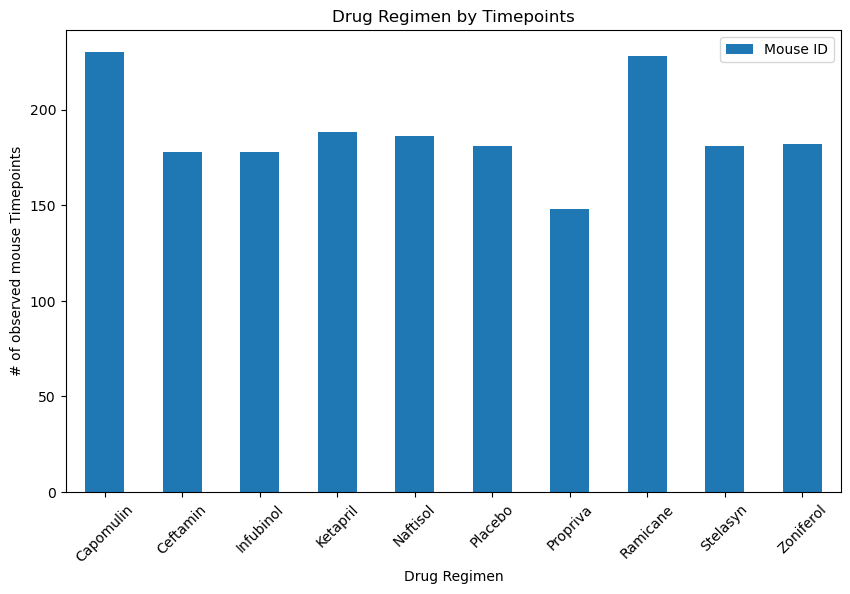

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
X_val=results_data_complete.groupby ("Drug Regimen").count ()
X_val.plot (kind ="bar", y= "Mouse ID", figsize=(10, 6))
#results_data_complete.plot (kind ="bar",x= "X_val", y= "Timepoint", figsize=(10, 10))
plt.title ('Drug Regimen by Timepoints')
plt.xlabel ('Drug Regimen')
plt.ylabel ('# of observed mouse Timepoints')
plt.xticks (rotation =45)
plt. show

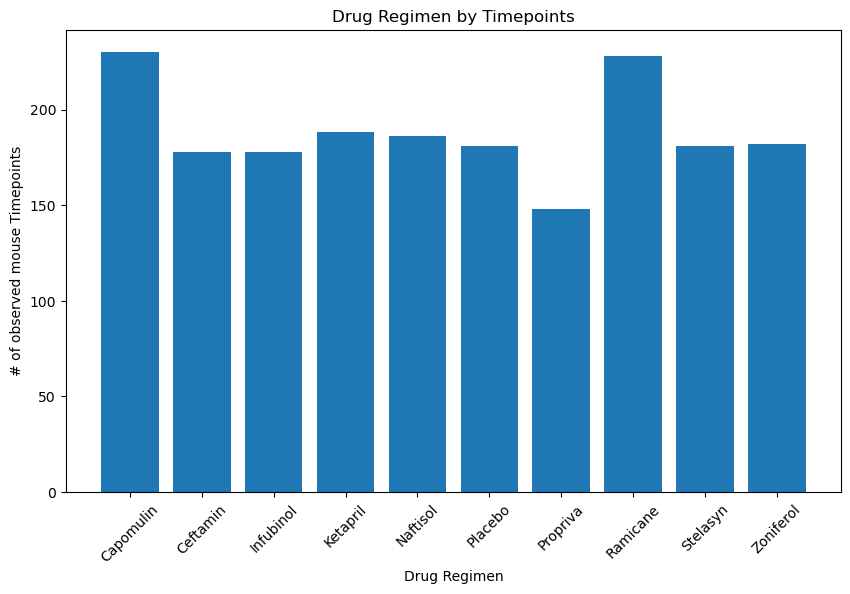

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
X_val= results_data_complete.groupby ("Drug Regimen").count()
plt.figure (figsize =(10,6))
plt.bar (X_val.index, X_val['Mouse ID'])
plt.title ('Drug Regimen by Timepoints')
plt.xlabel ('Drug Regimen')
plt.ylabel ('# of observed mouse Timepoints')
plt.xticks (rotation =45)
plt.show ()

<function matplotlib.pyplot.show(close=None, block=None)>

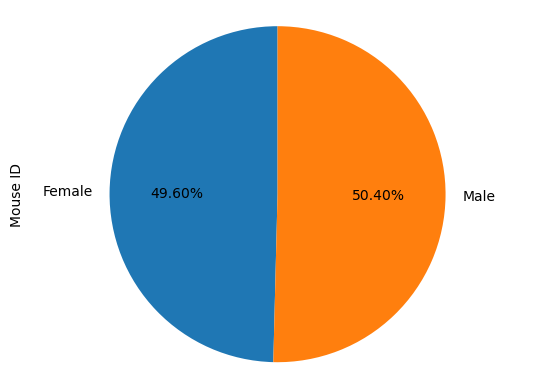

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = results_data_complete.groupby (["Sex"]) ["Mouse ID"].nunique ()
per_sex = sex/count_new*100
per_sex.plot(kind= "pie",labels=per_sex.index, autopct="%1.2f%%",startangle =90)
#plt.title("Percentage of Mice per Sex")
plt.axis("equal")

#per_sexptl. title ("Sex")
#ptl.pie (per_sex,labels = Per_sex, shadow = True, startangle = 90)
plt.show
#sex. head (2)

In [22]:
print (per_sex)

Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

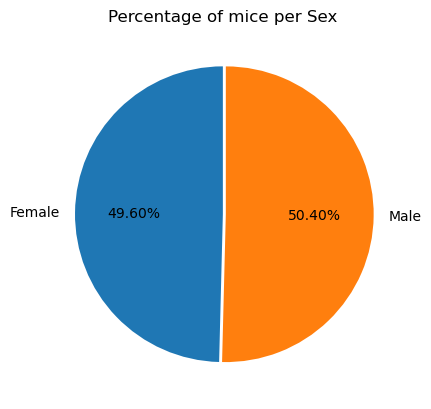

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = results_data_complete.groupby (["Sex"]) ["Mouse ID"].nunique ()
per_sex = sex/count_new*100
explode= (0,0.02)
plt.pie (per_sex,labels = per_sex.index, autopct ="%1.2f%%", startangle=90, explode =explode)
plt.title ("Percentage of mice per Sex")
 
plt.show

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Treatment_group=results_data_complete.groupby ("Mouse ID") ["Timepoint"].max ()
Treatment_group.head (35)
Treatment_group = Treatment_group.reset_index ()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#selected_columns = ["Mouse ID","Timepoint", "Tumor Volume (mm3)","Drug Regimen"]
#tumor_volume_values = results_data_complete.loc[Treatment_group.index, selected_columns]
#tumor_volume_values. info()
treatment_group_time = pd.merge (Treatment_group, results_data_complete, how = "left", on = ["Mouse ID", "Timepoint"])
treatment_group_time



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Mouse_time
0,a203,45,Infubinol,Female,20,23,67.973419,2,a203_45
1,a251,45,Infubinol,Female,21,25,65.525743,1,a251_45
2,a262,45,Placebo,Female,17,29,70.717621,4,a262_45
3,a275,45,Ceftamin,Female,20,28,62.999356,3,a275_45
4,a366,30,Stelasyn,Female,16,29,63.440686,1,a366_30
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,z435_10
244,z578,45,Ramicane,Male,11,16,30.638696,0,z578_45
245,z581,45,Infubinol,Female,24,25,62.754451,3,z581_45
246,z795,45,Naftisol,Female,13,29,65.741070,3,z795_45


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_tumor = {}
for drug_name in drugs_names:
    filtered_data = treatment_group_time[treatment_group_time["Drug Regimen"] == drug_name]
    volume_tumor[drug_name] = filtered_data["Tumor Volume (mm3)"].tolist()

    tumor_values= []
for drug_name in drugs_names:
    tumor_values.append (volume_tumor[drug_name])
    
capomulin_volume = pd.Series (volume_tumor['Capomulin'])
ramicane_volume = pd.Series (volume_tumor['Ramicane'])
infubinol_volume = pd. Series (volume_tumor['Infubinol'])
ceftamin_volume = pd.Series (volume_tumor['Ceftamin'])

    
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#_________________capomulin____________________
capomulin_volume = pd.Series (volume_tumor['Capomulin'])
quartiles = capomulin_volume.quantile ([.25,.5,.75])
lowerq = quartiles [.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliners = [value for value in capomulin_volume if value < lower_bound or value > upper_bound]
print(f"The interquartile range of Capomulin tumors: {iqr}")
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
print (f"Posible outliners{outliners}.")

#_________________ramicare____________________

ramicane_volume = pd.Series (volume_tumor['Ramicane'])
quartiles = ramicane_volume.quantile ([.25,.5,.75])
lowerq = quartiles [.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliners = [value for value in ramicane_volume if value < lower_bound or value > upper_bound]
print(f"The interquartile range of ramicane tumors: {iqr}")
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
print (f"Posible outliners{outliners}.")

#_________________Infubinol____________________
infubinol_volume = pd. Series (volume_tumor['Infubinol'])
quartiles = infubinol_volume.quantile ([.25,.5,.75])
lowerq = quartiles [.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliners = [value for value in infubinol_volume if value < lower_bound or value > upper_bound]
print(f"The interquartile range of infubinol tumors: {iqr}")
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
print (f"Posible outliners{outliners}.")

#_________________ceftamin____________________
ceftamin_volume = pd.Series (volume_tumor['Ceftamin'])
quartiles = ceftamin_volume.quantile ([.25,.5,.75])
lowerq = quartiles [.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliners = [value for value in ceftamin_volume if value < lower_bound or value > upper_bound]
print(f"The interquartile range of ceftamin tumors: {iqr}")
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
print (f"Posible outliners{outliners}.")

#add subset 

#capomulin_volume


The interquartile range of Capomulin tumors: 7.781863460000004
Posible outliners[].
The interquartile range of ramicane tumors: 9.098536719999998
Posible outliners[].
The interquartile range of infubinol tumors: 11.477135160000003
Posible outliners[36.3213458].
The interquartile range of ceftamin tumors: 15.577752179999997
Posible outliners[].


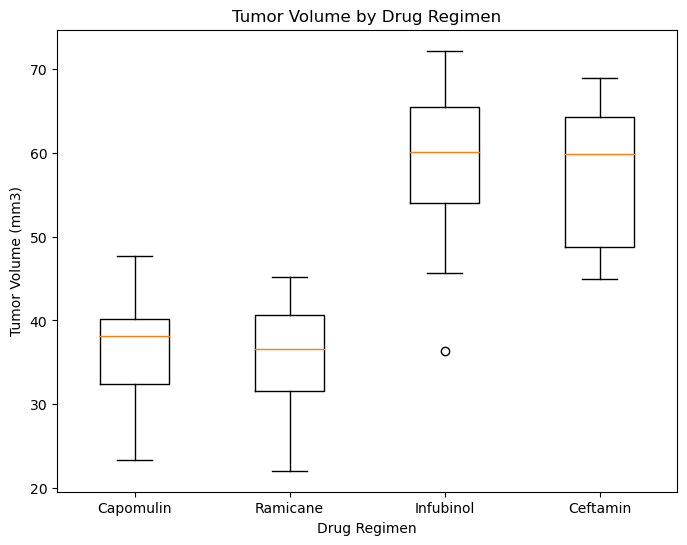

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_values, labels=drugs_names)
plt.title("Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [52]:
capomulin_mouse = results_data_complete.loc [results_data_complete ['Drug Regimen'] == "Capomulin", :]
capomulin_mouse. head (2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse_time
10,s185,Capomulin,Female,3,17,0,45.000000,0,s185_0
11,s185,Capomulin,Female,3,17,5,43.878496,0,s185_5


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse_time
371,l509,Capomulin,Male,17,21,0,45.000000,0,l509_0
372,l509,Capomulin,Male,17,21,5,45.851193,0,l509_5
373,l509,Capomulin,Male,17,21,10,46.759074,0,l509_10
374,l509,Capomulin,Male,17,21,15,47.488599,1,l509_15
375,l509,Capomulin,Male,17,21,20,48.070452,2,l509_20
376,l509,Capomulin,Male,17,21,25,44.006257,2,l509_25
377,l509,Capomulin,Male,17,21,30,44.708055,2,l509_30
378,l509,Capomulin,Male,17,21,35,40.207288,2,l509_35
379,l509,Capomulin,Male,17,21,40,40.770813,2,l509_40
380,l509,Capomulin,Male,17,21,45,41.483008,3,l509_45


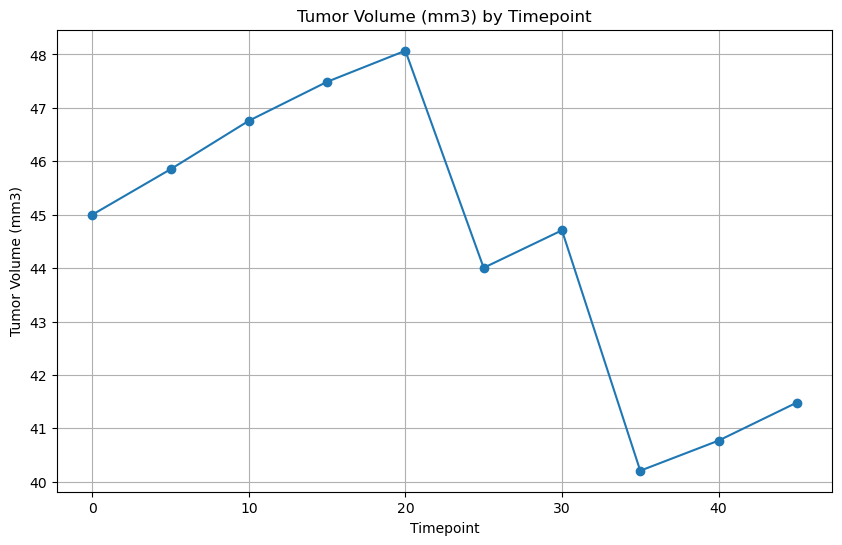

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_l509= results_data_complete.loc[results_data_complete ['Mouse ID']== "l509",:]
mouse_l509. head (15)
timepoints = mouse_l509 ['Timepoint']
tumor_volume = mouse_l509 ['Tumor Volume (mm3)']
plt.figure (figsize = (10,6))
plt.plot (timepoints,tumor_volume, marker= 'o')
plt.title ('Tumor Volume (mm3) by Timepoint')
plt.xlabel ('Timepoint')
plt.ylabel ('Tumor Volume (mm3)')
plt.grid (True)
plt.show
mouse_l509. head (15)




,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0


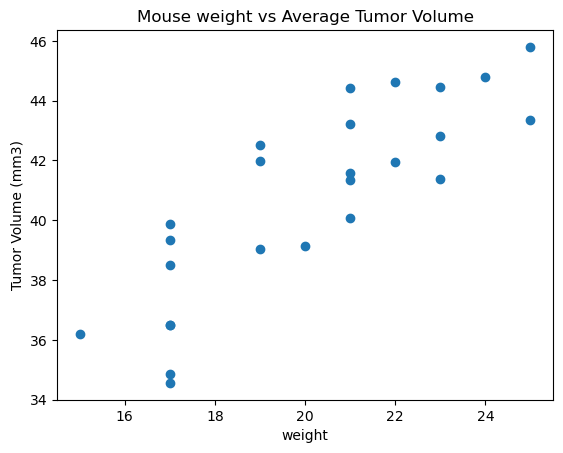

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = results_data_complete.loc [results_data_complete ['Drug Regimen'] == "Capomulin", :]
tumor_volume = capomulin_data.groupby (['Mouse ID']).mean (numeric_only = True)
mouse_weight =tumor_volume ['Weight (g)']
tumor_ave = tumor_volume ['Tumor Volume (mm3)']
plt.scatter (mouse_weight,tumor_ave)
plt.title ('Mouse weight vs Average Tumor Volume')
plt.xlabel ('weight')
plt.ylabel ('Tumor Volume (mm3)')
plt.show
tumor_volume. head(2)

## Correlation and Regression

The correlation between both factors is 0.8


<function matplotlib.pyplot.show(close=None, block=None)>

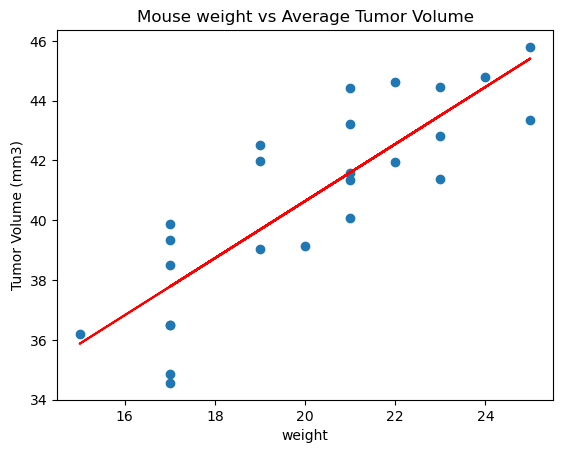

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = results_data_complete.loc [results_data_complete ['Drug Regimen'] == "Capomulin", :]
tumor_volume = capomulin_data.groupby (['Mouse ID']).mean (numeric_only = True)
mouse_weight =tumor_volume ['Weight (g)']
tumor_ave = tumor_volume ['Tumor Volume (mm3)']
correlation = st.pearsonr (mouse_weight, tumor_ave)

(slope, intercept,rvalue, pvalue, stderr)= linregress(mouse_weight,tumor_ave)
regres_values = mouse_weight * slope + intercept
line_eq = 'y=' +str (round(slope,2)) + 'x +' + str (round(intercept,2))

plt.scatter (mouse_weight,tumor_ave)
plt.plot (mouse_weight,regres_values, "r-")
plt.title ('Mouse weight vs Average Tumor Volume')
plt.xlabel ('weight')
plt.ylabel ('Tumor Volume (mm3)')
print (f"The correlation between both factors is {round(correlation[0],1)}")

plt.show